ANÁLISE EXPLORATÓRIA - CIC-IDS2018 DATASET

1. INFORMAÇÕES BÁSICAS DOS ARQUIVOS

Processando: Thuesday-20-02-2018_TrafficForML_CICFlowMeter.csv
  Shape: (7948748, 84)
  Linhas: 7,948,748

Processando: Wednesday-21-02-2018_TrafficForML_CICFlowMeter.csv
  Shape: (1048575, 80)
  Linhas: 1,048,575

DATASET COMPLETO (ambos os arquivos):
  Total de linhas: 8,997,323
  Total de colunas: 84

2. DISTRIBUIÇÃO DE CLASSES E TIPOS DE ATAQUES

Total de classes únicas: 4

Distribuição completa:
Label
Benign                    7733390
DDOS attack-HOIC           686012
DDoS attacks-LOIC-HTTP     576191
DDOS attack-LOIC-UDP         1730
Name: count, dtype: int64

RESUMO:
  Tráfego Benigno: 7,733,390 (85.95%)
  Tráfego de Ataque: 1,263,933 (14.05%)

TIPOS DE ATAQUES DETECTADOS:
 1. DDOS attack-HOIC               | Total:  686,012 ( 7.62% do dataset | 54.28% dos ataques)
 2. DDoS attacks-LOIC-HTTP         | Total:  576,191 ( 6.40% do dataset | 45.59% dos ataques)
 3. DDOS attack-LOIC-UDP           | Total

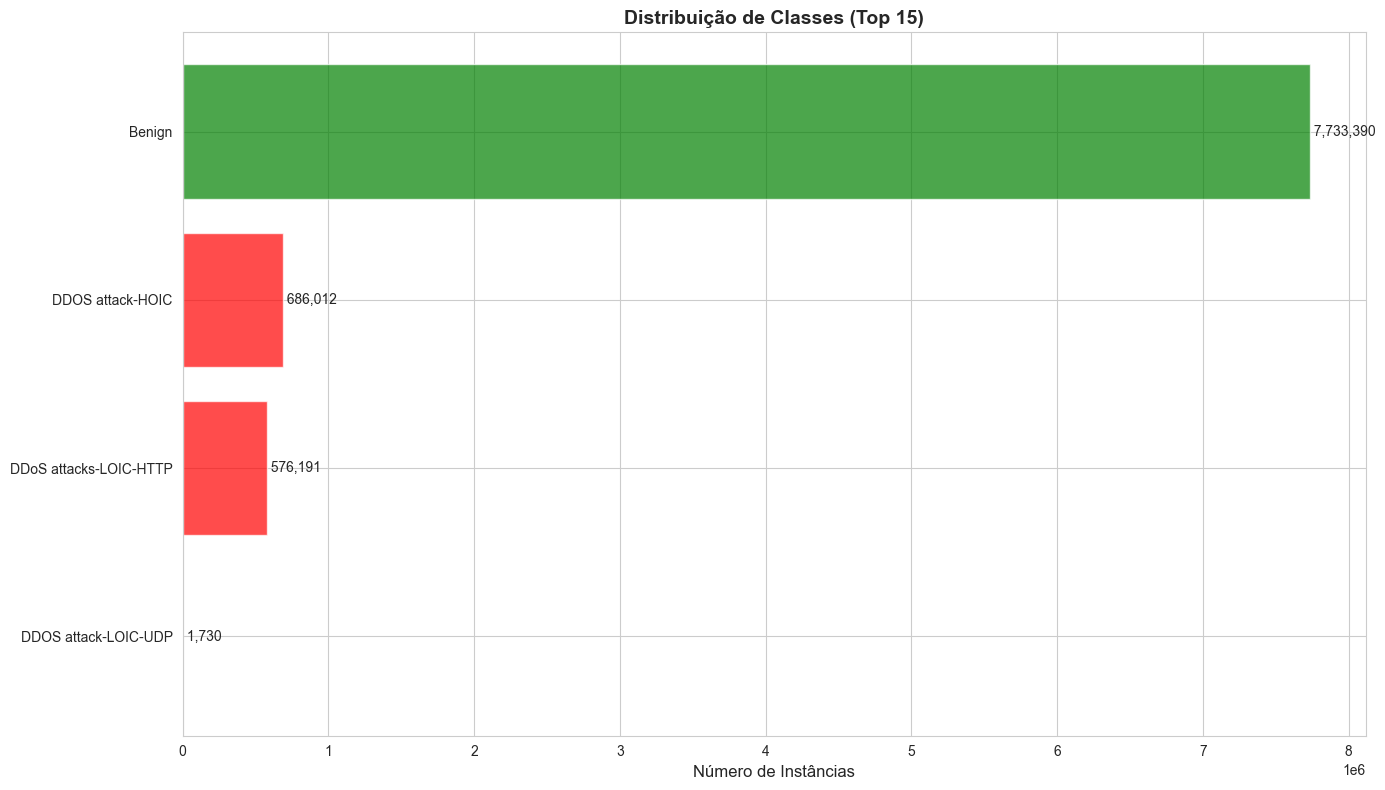


3. ANÁLISE DE PROTOCOLOS DE REDE

Protocolos detectados: 3

Distribuição por Protocolo (Código IANA):
    0 - HOPOPT          |    144,193 ( 1.60%)
    6 - TCP             |  6,340,507 (70.47%)
   17 - UDP             |  2,512,623 (27.93%)


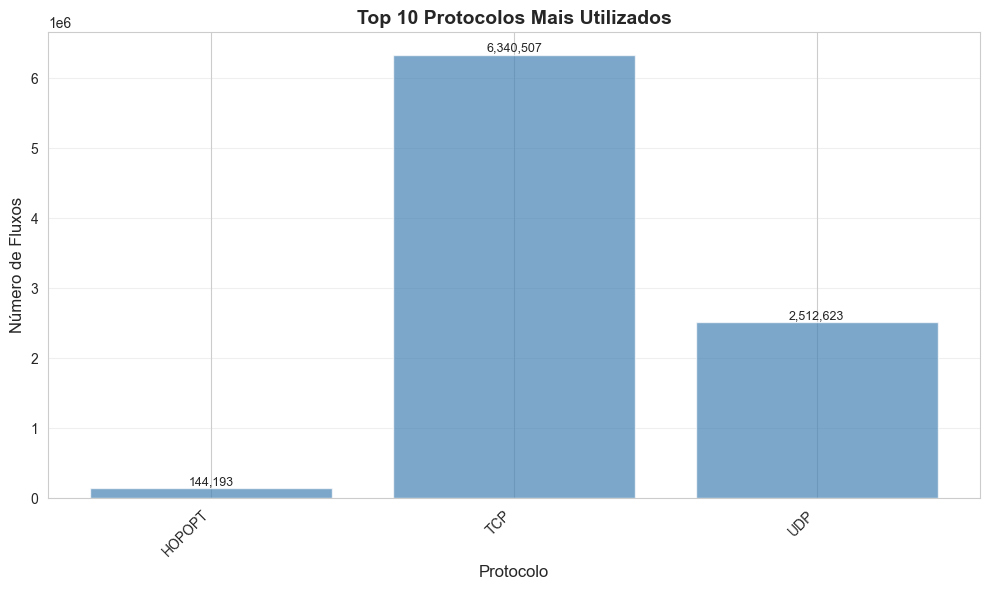


4. ANÁLISE DE PORTAS (SRC E DST)

Top 20 Portas de Origem (Src Port):
 1. Porta   443 |    630,995 ( 7.01%)
 2. Porta   445 |    210,031 ( 2.33%)
 3. Porta    80 |    153,777 ( 1.71%)
 4. Porta     0 |    144,134 ( 1.60%)
 5. Porta  3389 |     80,222 ( 0.89%)
 6. Porta 49672 |     22,317 ( 0.25%)
 7. Porta 49673 |     10,838 ( 0.12%)
 8. Porta   123 |      9,594 ( 0.11%)
 9. Porta    68 |      8,080 ( 0.09%)
10. Porta 49674 |      4,985 ( 0.06%)
11. Porta   137 |      4,290 ( 0.05%)
12. Porta 49682 |      2,480 ( 0.03%)
13. Porta 49688 |      2,211 ( 0.02%)
14. Porta 49675 |      1,983 ( 0.02%)
15. Porta   138 |      1,965 ( 0.02%)
16. Porta 49687 |      1,960 ( 0.02%)
17. Porta 49691 |      1,937 ( 0.02%)
18. Porta 49689 |      1,776 ( 0.02%)
19. Porta 49686 |      1,686 ( 0.02%)
20. Porta 49685 |      1,672 ( 0.02%)

Top 20 Portas de Destino (Dst Port):
 1. Porta    53 DNS          |  2,457,313 (27.31%)
 2. Porta    80 HTTP         |  2,134,516 (23.72%)
 3. Porta   443 HTTPS        

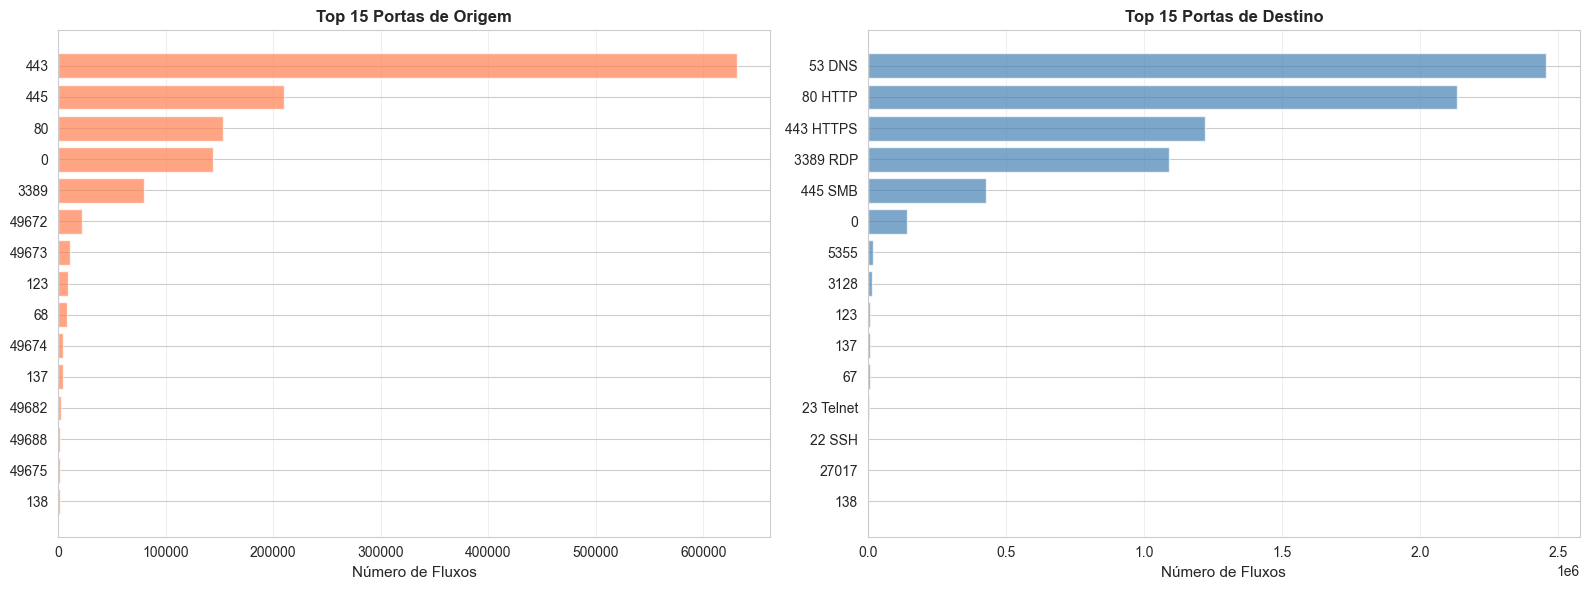


5. ANÁLISE DE FLAGS TCP

Estatísticas de Flags TCP:
Flag                 | Total de Ocorrências |       Fluxos com Flag > 0
----------------------------------------------------------------------
FIN                  |               45,952 |          45,952 ( 0.51%)
SYN                  |              456,529 |         456,529 ( 5.07%)
RST                  |            2,208,200 |       2,208,200 (24.54%)
PSH                  |            3,629,119 |       3,629,119 (40.34%)
ACK                  |            2,680,183 |       2,680,183 (29.79%)
URG                  |              305,234 |         305,234 ( 3.39%)
CWE Flag             |                    0 |               0 ( 0.00%)
ECE                  |            2,208,214 |       2,208,214 (24.54%)


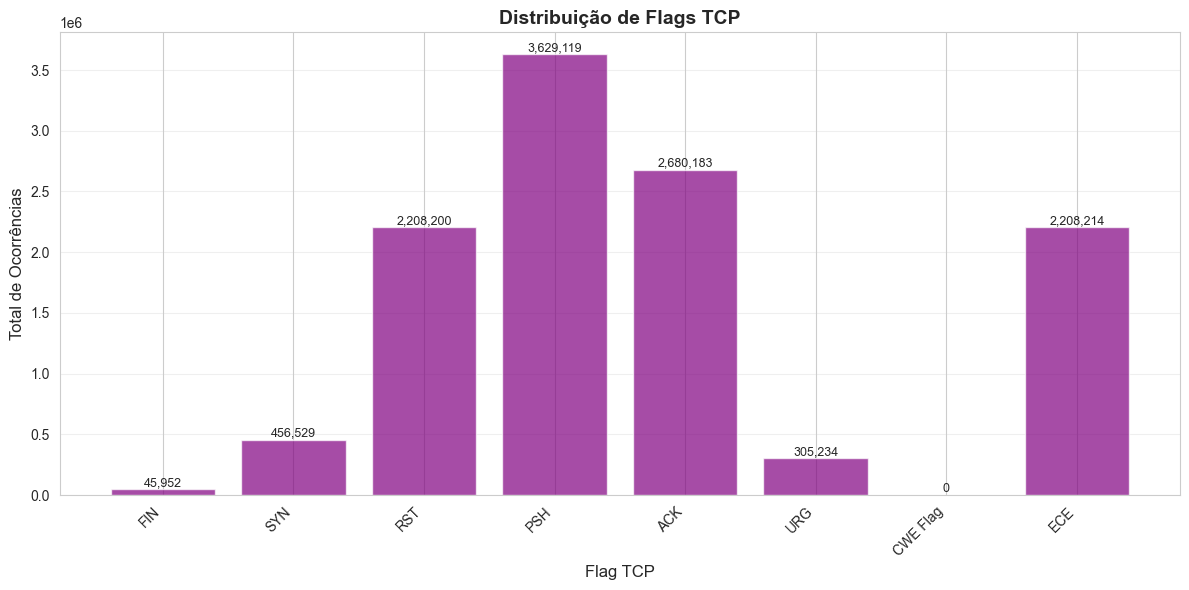


6. ESTATÍSTICAS DE DURAÇÃO E VOLUME DE TRÁFEGO

Flow Duration (microsegundos):
count    8.997323e+06
mean     1.200257e+07
std      3.085971e+07
min      0.000000e+00
25%      6.840000e+02
50%      1.845000e+04
75%      2.332900e+06
max      1.200000e+08
Name: Flow Duration, dtype: float64

Total Forward Packets:
count    8.997323e+06
mean     3.793932e+01
std      2.041673e+03
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      5.000000e+00
max      3.096290e+05
Name: Tot Fwd Pkts, dtype: float64

Total Backward Packets:
count    8.997323e+06
mean     6.083365e+00
std      1.485687e+02
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      4.000000e+00
max      2.580600e+04
Name: Tot Bwd Pkts, dtype: float64

7. ANÁLISE DE VALORES AUSENTES

Colunas com valores ausentes: 5
     Coluna  Valores Ausentes  Percentual
    Flow ID           1048575   11.654300
     Src IP           1048575   11.654300
   Src Port           1048575   11.654300
    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração visual
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

files = [
    "Thuesday-20-02-2018_TrafficForML_CICFlowMeter.csv",
    "Wednesday-21-02-2018_TrafficForML_CICFlowMeter.csv",
]

print("=" * 80)
print("ANÁLISE EXPLORATÓRIA - CIC-IDS2018 DATASET")
print("=" * 80)

# -----------------------------
# 1. LEITURA E INFORMAÇÕES BÁSICAS
# -----------------------------
print("\n" + "=" * 80)
print("1. INFORMAÇÕES BÁSICAS DOS ARQUIVOS")
print("=" * 80)

dfs = []
for file in files:
    print(f"\nProcessando: {file}")
    
    # Ler em chunks para economizar memória
    chunk_size = 500000
    chunks = []
    
    for chunk in pd.read_csv(file, chunksize=chunk_size, low_memory=False):
        chunk.columns = [c.strip() for c in chunk.columns]
        chunks.append(chunk)
    
    df_file = pd.concat(chunks, ignore_index=True)
    print(f"  Shape: {df_file.shape}")
    print(f"  Linhas: {len(df_file):,}")
    
    dfs.append(df_file)

# Concatenar ambos os datasets
df = pd.concat(dfs, ignore_index=True)
print(f"\n{'='*80}")
print(f"DATASET COMPLETO (ambos os arquivos):")
print(f"  Total de linhas: {len(df):,}")
print(f"  Total de colunas: {len(df.columns)}")
print(f"{'='*80}")

# -----------------------------
# 2. ANÁLISE DA COLUNA LABEL (TIPOS DE ATAQUES)
# -----------------------------
print("\n" + "=" * 80)
print("2. DISTRIBUIÇÃO DE CLASSES E TIPOS DE ATAQUES")
print("=" * 80)

# Limpar labels
df['Label'] = df['Label'].astype(str).str.strip()

# Contar ocorrências
label_counts = df['Label'].value_counts()
print(f"\nTotal de classes únicas: {len(label_counts)}")
print(f"\nDistribuição completa:")
print(label_counts)

# Separar benignos e ataques
benign_count = label_counts.get('Benign', 0)
attack_labels = label_counts[label_counts.index != 'Benign']
total_attacks = attack_labels.sum()

print(f"\n{'='*80}")
print(f"RESUMO:")
print(f"  Tráfego Benigno: {benign_count:,} ({100*benign_count/len(df):.2f}%)")
print(f"  Tráfego de Ataque: {total_attacks:,} ({100*total_attacks/len(df):.2f}%)")
print(f"{'='*80}")

print(f"\nTIPOS DE ATAQUES DETECTADOS:")
for i, (attack, count) in enumerate(attack_labels.items(), 1):
    percentage = 100 * count / len(df)
    percentage_attacks = 100 * count / total_attacks
    print(f"{i:2d}. {attack:30s} | Total: {count:>8,} ({percentage:>5.2f}% do dataset | {percentage_attacks:>5.2f}% dos ataques)")

# Gráfico de distribuição de classes
plt.figure(figsize=(14, 8))
top_labels = label_counts.head(15)
colors = ['green' if x == 'Benign' else 'red' for x in top_labels.index]
plt.barh(range(len(top_labels)), top_labels.values, color=colors, alpha=0.7)
plt.yticks(range(len(top_labels)), top_labels.index)
plt.xlabel('Número de Instâncias', fontsize=12)
plt.title('Distribuição de Classes (Top 15)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
for i, v in enumerate(top_labels.values):
    plt.text(v, i, f' {v:,}', va='center', fontsize=10)
plt.tight_layout()
plt.show()

# -----------------------------
# 3. ANÁLISE DE PROTOCOLOS
# -----------------------------
print("\n" + "=" * 80)
print("3. ANÁLISE DE PROTOCOLOS DE REDE")
print("=" * 80)

# Converter Protocol para numérico
df['Protocol'] = pd.to_numeric(df['Protocol'], errors='coerce')
protocol_counts = df['Protocol'].value_counts().sort_index()

# Mapeamento de protocolos (IANA)
protocol_map = {
    0: 'HOPOPT',
    1: 'ICMP',
    6: 'TCP',
    17: 'UDP',
    41: 'IPv6',
    43: 'IPv6-Route',
    44: 'IPv6-Frag',
    47: 'GRE',
    50: 'ESP',
    51: 'AH',
    58: 'IPv6-ICMP',
    89: 'OSPF',
    132: 'SCTP'
}

print(f"\nProtocolos detectados: {len(protocol_counts)}")
print(f"\nDistribuição por Protocolo (Código IANA):")

for proto_num, count in protocol_counts.items():
    if pd.notna(proto_num):
        proto_name = protocol_map.get(int(proto_num), f'Unknown ({int(proto_num)})')
        percentage = 100 * count / len(df)
        print(f"  {int(proto_num):3d} - {proto_name:15s} | {count:>10,} ({percentage:>5.2f}%)")

# Gráfico de protocolos
plt.figure(figsize=(10, 6))
top_protocols = protocol_counts.head(10)
protocol_labels = [protocol_map.get(int(p), f'Proto {int(p)}') if pd.notna(p) else 'NaN' 
                   for p in top_protocols.index]
plt.bar(range(len(top_protocols)), top_protocols.values, alpha=0.7, color='steelblue')
plt.xticks(range(len(top_protocols)), protocol_labels, rotation=45, ha='right')
plt.ylabel('Número de Fluxos', fontsize=12)
plt.xlabel('Protocolo', fontsize=12)
plt.title('Top 10 Protocolos Mais Utilizados', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
for i, v in enumerate(top_protocols.values):
    plt.text(i, v, f'{v:,}', ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()

# -----------------------------
# 4. ANÁLISE DE PORTAS
# -----------------------------
print("\n" + "=" * 80)
print("4. ANÁLISE DE PORTAS (SRC E DST)")
print("=" * 80)

# Converter portas para numérico
df['Src Port'] = pd.to_numeric(df['Src Port'], errors='coerce')
df['Dst Port'] = pd.to_numeric(df['Dst Port'], errors='coerce')

print("\nTop 20 Portas de Origem (Src Port):")
src_port_counts = df['Src Port'].value_counts().head(20)
for i, (port, count) in enumerate(src_port_counts.items(), 1):
    if pd.notna(port):
        percentage = 100 * count / len(df)
        print(f"{i:2d}. Porta {int(port):5d} | {count:>10,} ({percentage:>5.2f}%)")

print("\nTop 20 Portas de Destino (Dst Port):")
dst_port_counts = df['Dst Port'].value_counts().head(20)
well_known_ports = {
    20: 'FTP-Data', 21: 'FTP', 22: 'SSH', 23: 'Telnet',
    25: 'SMTP', 53: 'DNS', 80: 'HTTP', 110: 'POP3',
    143: 'IMAP', 443: 'HTTPS', 445: 'SMB', 3306: 'MySQL',
    3389: 'RDP', 5432: 'PostgreSQL', 8080: 'HTTP-Alt'
}

for i, (port, count) in enumerate(dst_port_counts.items(), 1):
    if pd.notna(port):
        port_int = int(port)
        port_name = well_known_ports.get(port_int, '')
        percentage = 100 * count / len(df)
        print(f"{i:2d}. Porta {port_int:5d} {port_name:12s} | {count:>10,} ({percentage:>5.2f}%)")

# Gráfico de portas de destino
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Top 15 Src Ports
top_src = src_port_counts.head(15)
ax1.barh(range(len(top_src)), top_src.values, color='coral', alpha=0.7)
ax1.set_yticks(range(len(top_src)))
ax1.set_yticklabels([f'{int(p)}' if pd.notna(p) else 'NaN' for p in top_src.index])
ax1.set_xlabel('Número de Fluxos', fontsize=11)
ax1.set_title('Top 15 Portas de Origem', fontsize=12, fontweight='bold')
ax1.invert_yaxis()
ax1.grid(axis='x', alpha=0.3)

# Top 15 Dst Ports
top_dst = dst_port_counts.head(15)
ax2.barh(range(len(top_dst)), top_dst.values, color='steelblue', alpha=0.7)
ax2.set_yticks(range(len(top_dst)))
dst_labels = []
for p in top_dst.index:
    if pd.notna(p):
        port_int = int(p)
        name = well_known_ports.get(port_int, '')
        dst_labels.append(f'{port_int} {name}' if name else f'{port_int}')
    else:
        dst_labels.append('NaN')
ax2.set_yticklabels(dst_labels)
ax2.set_xlabel('Número de Fluxos', fontsize=11)
ax2.set_title('Top 15 Portas de Destino', fontsize=12, fontweight='bold')
ax2.invert_yaxis()
ax2.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# -----------------------------
# 5. ANÁLISE DE FLAGS TCP
# -----------------------------
print("\n" + "=" * 80)
print("5. ANÁLISE DE FLAGS TCP")
print("=" * 80)

tcp_flags = ['FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt', 
             'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt', 
             'CWE Flag Count', 'ECE Flag Cnt']

flag_stats = {}
for flag in tcp_flags:
    if flag in df.columns:
        df[flag] = pd.to_numeric(df[flag], errors='coerce')
        total = df[flag].sum()
        non_zero = (df[flag] > 0).sum()
        flag_stats[flag] = {'total': total, 'non_zero': non_zero}

print("\nEstatísticas de Flags TCP:")
print(f"{'Flag':20s} | {'Total de Ocorrências':>20s} | {'Fluxos com Flag > 0':>25s}")
print("-" * 70)
for flag, stats in flag_stats.items():
    flag_name = flag.replace(' Flag Cnt', '').replace(' Count', '')
    percentage = 100 * stats['non_zero'] / len(df)
    print(f"{flag_name:20s} | {int(stats['total']):>20,} | {stats['non_zero']:>15,} ({percentage:>5.2f}%)")

# Gráfico de flags
plt.figure(figsize=(12, 6))
flag_names = [f.replace(' Flag Cnt', '').replace(' Count', '') for f in flag_stats.keys()]
flag_totals = [stats['total'] for stats in flag_stats.values()]
plt.bar(flag_names, flag_totals, color='purple', alpha=0.7)
plt.ylabel('Total de Ocorrências', fontsize=12)
plt.xlabel('Flag TCP', fontsize=12)
plt.title('Distribuição de Flags TCP', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
for i, v in enumerate(flag_totals):
    plt.text(i, v, f'{int(v):,}', ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()

# -----------------------------
# 6. ESTATÍSTICAS DE DURAÇÃO E VOLUME
# -----------------------------
print("\n" + "=" * 80)
print("6. ESTATÍSTICAS DE DURAÇÃO E VOLUME DE TRÁFEGO")
print("=" * 80)

# Converter colunas relevantes
df['Flow Duration'] = pd.to_numeric(df['Flow Duration'], errors='coerce')
df['Tot Fwd Pkts'] = pd.to_numeric(df['Tot Fwd Pkts'], errors='coerce')
df['Tot Bwd Pkts'] = pd.to_numeric(df['Tot Bwd Pkts'], errors='coerce')

print("\nFlow Duration (microsegundos):")
print(df['Flow Duration'].describe())

print("\nTotal Forward Packets:")
print(df['Tot Fwd Pkts'].describe())

print("\nTotal Backward Packets:")
print(df['Tot Bwd Pkts'].describe())

# -----------------------------
# 7. VALORES AUSENTES
# -----------------------------
print("\n" + "=" * 80)
print("7. ANÁLISE DE VALORES AUSENTES")
print("=" * 80)

missing = df.isnull().sum()
missing_pct = 100 * missing / len(df)
missing_df = pd.DataFrame({
    'Coluna': missing.index,
    'Valores Ausentes': missing.values,
    'Percentual': missing_pct.values
})
missing_df = missing_df[missing_df['Valores Ausentes'] > 0].sort_values('Valores Ausentes', ascending=False)

if len(missing_df) > 0:
    print(f"\nColunas com valores ausentes: {len(missing_df)}")
    print(missing_df.to_string(index=False))
else:
    print("\n✓ Nenhum valor ausente detectado!")

# -----------------------------
# 8. RESUMO FINAL
# -----------------------------
print("\n" + "=" * 80)
print("8. RESUMO EXECUTIVO")
print("=" * 80)

print(f"""
DATASET: CIC-IDS2018 (Thuesday + Wednesday)

📊 DIMENSÕES:
   - Total de fluxos: {len(df):,}
   - Total de features: {len(df.columns)}

🏷️  CLASSES:
   - Tráfego Benigno: {benign_count:,} ({100*benign_count/len(df):.2f}%)
   - Tráfego de Ataque: {total_attacks:,} ({100*total_attacks/len(df):.2f}%)
   - Tipos de ataques: {len(attack_labels)}

🌐 PROTOCOLOS:
   - Protocolos únicos: {len(protocol_counts)}
   - Protocolo dominante: {protocol_map.get(int(protocol_counts.index[0]), protocol_counts.index[0])} ({100*protocol_counts.values[0]/len(df):.2f}%)

🔌 PORTAS:
   - Dst Port mais comum: {int(dst_port_counts.index[0]) if pd.notna(dst_port_counts.index[0]) else 'N/A'} ({100*dst_port_counts.values[0]/len(df):.2f}%)
   - Src Port mais comum: {int(src_port_counts.index[0]) if pd.notna(src_port_counts.index[0]) else 'N/A'} ({100*src_port_counts.values[0]/len(df):.2f}%)

🚩 FLAGS TCP:
   - Flag mais comum: {list(flag_stats.keys())[0].replace(' Flag Cnt', '').replace(' Count', '')}
   - Total de flags: {sum([s['total'] for s in flag_stats.values()]):,}
""")

print("=" * 80)
print("ANÁLISE CONCLUÍDA!")
print("=" * 80)